# **Load the dataset**

# **Downloading neccessary module**

In [ ]:
!pip3 install nltk
!pip3 install gensim
!pip3 install emoji
!pip3 install transformers
!pip install scikit-learn
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=331883e95360522943fc4f8dae15c8af03cbe8710cf72e720c004c8ded6b170a
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# downloading nltk package
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import pandas as pd
df=pd.read_csv("EcoPreprocessed.csv") #load the dataset here
df

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive
...,...,...,...,...
4079,852,yo yo yo love go if want one smart speaker val...,0.4571,positive
4080,2163,youtube music,0.0000,neutral
4081,2488,youtube support nahi kartasong recognise achha...,0.0000,neutral
4082,651,yup proscontrols wipro light amazinglysony bra...,0.0000,neutral


In [ ]:
#random sampling the data for equal proportions of positive negative and neutral
import pandas as pd
division_groups = df.groupby('division')
positive_df = division_groups.get_group('positive').sample(n=700)
neutral_df = division_groups.get_group('neutral')
negative_df = division_groups.get_group('negative')
new_df = pd.concat([positive_df, neutral_df, negative_df], ignore_index=True)

In [ ]:
new_df.shape

(1718, 4)

In [ ]:
reviewsList_temp =new_df['review'].tolist()
label_list =new_df['division'].tolist()
reviewsList_temp[:5]


['great smart device lot things help reminders alarm etc awesome experience talk hindi alexaupdate alexa speek marathi',
 'good productjust advance technology',
 'everything great productsometimes doesnt find overall great product keep homea big thank hindi version mom get early morning ask play bhajans make morning beautiful no battery drainage worry no worry type find particular song phone simple aski want make sure need power supply wifi amazon prime subscription',
 'everything good except sound quality could better crisp',
 'expectation']

### **Data-preprocessing**

In [ ]:
from gensim.parsing.preprocessing import strip_numeric
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import emoji
import gensim

In [ ]:
def check_if_verb(word):
    parts = wordnet.synsets(word, pos=wordnet.VERB)
    return len(parts) > 0
def check_if_noun(word):
    parts = wordnet.synsets(word, pos=wordnet.NOUN)
    return len(parts) > 0
def check_if_adv(word):
    parts = wordnet.synsets(word, pos=wordnet.ADV)
    return len(parts) > 0
def check_if_adj(word):
    parts = wordnet.synsets(word, pos=wordnet.ADJ)
    return len(parts) > 0
def preprocess_reviews(text):
    # Remove emojis
    processed_text = emoji.demojize(text)
    # Remove numeric characters
    processed_text = strip_numeric(text)
    # Remove non-alphanumeric characters and convert to lowercase
    processed_text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    # Tokenize the text
    token_list = gensim.utils.simple_preprocess(processed_text)
    # Remove stop words and non-nouns, verbs, adjectives, and adverbs
    stop_words = gensim.parsing.preprocessing.STOPWORDS
    token_list = [token for token in token_list if token not in stop_words
                  and (check_if_noun(token)
                  or check_if_verb(token)
                  or check_if_adj(token)
                  or check_if_adv(token))]
    return token_list

reviewsList=[]
for i in reviewsList_temp:
  string_temp=""
  processed_reviews_temp=preprocess_reviews(i)
  for j in processed_reviews_temp:
    if string_temp=="":
      string_temp=j
      continue
    else:
      if j=="":
        break
      else:
        string_temp=string_temp+" "+j
  reviewsList.append(string_temp)

reviewsList[:5] #preprocessed dataset

['great smart device lot things help reminders alarm awesome experience talk hindi marathi',
 'good advance technology',
 'great overall great product big thank hindi version mom early morning ask play morning beautiful battery drainage worry worry type particular song phone simple want sure need power supply wifi amazon prime subscription',
 'good sound quality better crisp',
 'expectation']

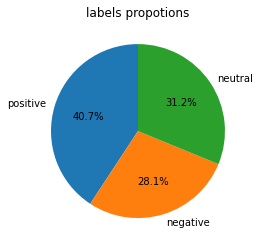

In [ ]:
import matplotlib.pyplot as plt
labels = ["positive","negative","neutral"]
positive_count=label_list.count("positive")
negative_count=label_list.count("negative")
neutral_count=label_list.count("neutral")
sizes = [positive_count,negative_count,neutral_count]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

ax.set_title('labels propotions')
plt.savefig("labels proportions")
plt.show()

data splitting into 60/20/20 splits

In [ ]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, labels_train, labels_test = train_test_split(reviewsList, label_list, test_size=0.2, random_state=42)
texts_train, texts_val, labels_train, labels_val = train_test_split(texts_train, labels_train, test_size=0.25, random_state=42)
from tabulate import tabulate
table_data = [["Label", "Training Set", "Validation Set", "Test Set"],
              ["Positive", labels_train.count("positive"), labels_val.count("positive"), labels_test.count("positive")],
              ["Negative", labels_train.count("negative"), labels_val.count("negative"), labels_test.count("negative")],
              ["Neutral", labels_train.count("neutral"), labels_val.count("neutral"), labels_test.count("neutral")],
              ["Total",len(labels_train), len(labels_val), len(labels_test)]]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))

╒══════════╤════════════════╤══════════════════╤════════════╕
│ Label    │   Training Set │   Validation Set │   Test Set │
╞══════════╪════════════════╪══════════════════╪════════════╡
│ Positive │            404 │              148 │        148 │
├──────────┼────────────────┼──────────────────┼────────────┤
│ Negative │            300 │               81 │        101 │
├──────────┼────────────────┼──────────────────┼────────────┤
│ Neutral  │            326 │              115 │         95 │
├──────────┼────────────────┼──────────────────┼────────────┤
│ Total    │           1030 │              344 │        344 │
╘══════════╧════════════════╧══════════════════╧════════════╛


### **Q2-kmeans clustering**

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from collections import Counter
from sklearn.metrics import confusion_matrix

In [ ]:
# vectorize the text
vectorizer = TfidfVectorizer()
T = vectorizer.fit_transform(reviewsList)
X=T.toarray()
import numpy as np
import numpy as np
class MyKMeans:
    def __init__(self, n_clusters=5, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X):
        # Step 1: Randomly initialize centroids
        self.centroids = self._initialize_centroids_step1(X)
        for i in range(self.max_iter):
            # Step 2: Assign each point to the closest centroid
            self.labels = self._assign_labels_step2(X)

            # Step 3: Update centroids by computing the mean of all points assigned to each cluster
            self.centroids = self._update_centroids_step3(X)

        return self.labels, self.centroids
    def _initialize_centroids_step1(self, X):
        n_samples, n_features = X.shape
        centroids_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[centroids_indices]
        return centroids
    def _assign_labels_step2(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        return labels
    def _update_centroids_step3(self, X):
        new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids
kmeans =MyKMeans(n_clusters=5)
kmeans.fit(X)
Y=kmeans.labels
Y

array([0, 0, 0, ..., 0, 0, 0])

a)When using k=5 clusters, give a few examples of the documents assigned to each cluster, and the top 5 tokens with the highest magnitude in the corresponding centroid.

In [ ]:
# Loop over each cluster
kmeans = MyKMeans(n_clusters=5, max_iter=100)
labels, centroids = kmeans.fit(X)
val_list = list(vectorizer.vocabulary_.values())
key_list = list(vectorizer.vocabulary_.keys())


In [ ]:
for i in range(kmeans.n_clusters):
    # Find documents assigned to cluster i
    cluster_docs = X[labels == i]

    # Compute top 5 features (tokens) with highest magnitude in centroid i
    centroid = centroids[i]
    feature_magnitudes = [(j, centroid[j]) for j in range(len(centroid))]
    top_features = [key_list[val_list.index(feature)] for feature, _ in sorted(feature_magnitudes, key=lambda x: abs(x[1]), reverse=True)[:5]]

    # Print results
    print(f"Cluster {i}: {len(cluster_docs)} documents")
    print(f"Top 5 features with highest magnitude in centroid: {top_features}")
    print("Examples:")
    pd.set_option('display.max_colwidth', None)
    a=new_df['review'][labels == i][:5]
    print(a)
    print("************************************************************************************************")
    print("\n")


Cluster 0: 1143 documents
Top 5 features with highest magnitude in centroid: ['connect', 'sound', 'quality', 'voice', 'good']
Examples:
0                                    great smart device lot things help reminders alarm etc awesome experience talk hindi alexaupdate alexa speek marathi
1                                                                                                                     good productjust advance technology
3                                                                                                 everything good except sound quality could better crisp
4                                                                                                                                             expectation
5    love sound quality build product but face issue voice recognition term volume adjustment need specify exact work name work do alexa else alexa sorry
Name: review, dtype: object
******************************************************************

**(c) Construct a confusion matrix between the k=5 clusters and your target labels.**

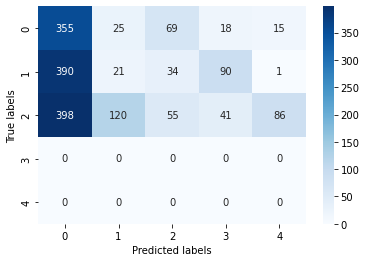

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Construct a confusion matrix
from sklearn.metrics import confusion_matrix
#map the lap=bel to respective numbers
label_map = {"positive": 2, "neutral": 1, "negative": 0}
true_labels = [label_map[label] for label in label_list]
cm = confusion_matrix(true_labels, labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig("confusion_matrix")
plt.show()


### **Classifier**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


In [ ]:
# Create metrics list

Accuracy=["Accuracy"]
Precision=["Precision"]
Recall=["Recall"]
F1_Score=["F1 score"]


**dummy classifier with most frequent stratergy**

In [ ]:
## dummy classifier with most frequent stratergy

dummy_clf_mst_frequent= DummyClassifier(strategy="most_frequent")#ask this question
dummy_clf_mst_frequent.fit(texts_train, labels_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
labels_predicted_most_frequent=dummy_clf_mst_frequent.predict(texts_val)
labels_predicted_most_frequent_train=dummy_clf_mst_frequent.predict(texts_train)

accuracy = accuracy_score(labels_val, labels_predicted_most_frequent)
accuracy_train = accuracy_score(labels_train, labels_predicted_most_frequent_train)

print(f"{accuracy=:.3f}")
Accuracy.append([accuracy_train.round(3),accuracy.round(3)])

precision = precision_score(labels_val, labels_predicted_most_frequent,average="macro")
precision_train = precision_score(labels_train, labels_predicted_most_frequent_train,average="macro")

print(f"{precision=:.3f}")
Precision.append([precision_train.round(3),precision.round(3)])

recall = recall_score(labels_val, labels_predicted_most_frequent,average="macro")
recall_train = recall_score(labels_train, labels_predicted_most_frequent_train,average="macro")

print(f"{recall=:.3f}")
Recall.append([recall_train.round(3),recall.round(3)])

f1_mostfrequent= f1_score(labels_val, labels_predicted_most_frequent,average="macro")
f1_mostfrequent_train= f1_score(labels_train, labels_predicted_most_frequent_train,average="macro")

print(f"{f1_mostfrequent=:.3f}")
F1_Score.append([f1_mostfrequent_train.round(3),f1_mostfrequent.round(3)])


accuracy=0.430
precision=0.143
recall=0.333
f1_mostfrequent=0.201


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


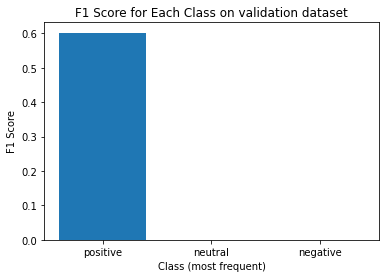

In [ ]:
# bar chart graph with the F1 score for each class most frequent
f1_scores_each_class_mostfrequent = {
    'positive': f1_score(labels_val, labels_predicted_most_frequent, average='macro', labels=['positive']),
    'neutral': f1_score(labels_val, labels_predicted_most_frequent, average='macro', labels=['neutral']),
    'negative': f1_score(labels_val, labels_predicted_most_frequent, average='macro', labels=['negative'])
}
plt.bar(f1_scores_each_class_mostfrequent.keys(), f1_scores_each_class_mostfrequent.values())
plt.title("F1 Score for Each Class on validation dataset")
plt.xlabel("Class (most frequent)")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
## dummy classifier with most frequent stratergy
dummy_clf_stratified = DummyClassifier(strategy="stratified")
dummy_clf_stratified.fit(texts_train, labels_train)

DummyClassifier(strategy='stratified')

In [ ]:
labels_predicted_stratified=dummy_clf_stratified.predict(texts_val)
labels_predicted_stratified_train=dummy_clf_stratified.predict(texts_train)

accuracy = accuracy_score(labels_val, labels_predicted_stratified)
accuracy_train = accuracy_score(labels_train, labels_predicted_stratified_train)

print(f"{accuracy=:.3f}")
Accuracy.append([accuracy_train.round(3),accuracy.round(3)])

precision = precision_score(labels_val, labels_predicted_stratified,average="macro")
precision_train = precision_score(labels_train, labels_predicted_stratified_train,average="macro")

print(f"{precision=:.3f}")
Precision.append([precision_train.round(3),precision.round(3)])

recall = recall_score(labels_val, labels_predicted_stratified,average="macro")
recall_train = recall_score(labels_train, labels_predicted_stratified_train,average="macro")

print(f"{recall=:.3f}")
Recall.append([recall_train.round(3),recall.round(3)])


f1_stratified = f1_score(labels_val, labels_predicted_stratified,average="macro")
f1_stratified_train= f1_score(labels_train, labels_predicted_stratified_train,average="macro")

print(f"{f1_stratified=:.3f}")
F1_Score.append([f1_stratified_train.round(3),f1_stratified.round(3)])



accuracy=0.366
precision=0.359
recall=0.359
f1_stratified=0.358


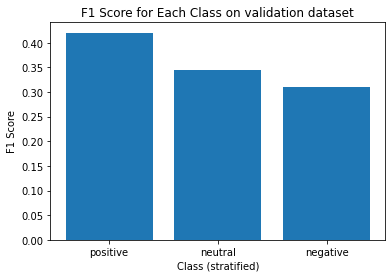

In [ ]:
## bar chart graph with the F1 score for each class stratified
f1_scores_each_class_strtified = {
    'positive': f1_score(labels_val, labels_predicted_stratified, average='macro', labels=['positive']),
    'neutral': f1_score(labels_val, labels_predicted_stratified, average='macro', labels=['neutral']),
    'negative': f1_score(labels_val, labels_predicted_stratified, average='macro', labels=['negative'])
}
plt.bar(f1_scores_each_class_strtified.keys(), f1_scores_each_class_strtified.values())
plt.title("F1 Score for Each Class on validation dataset")
plt.xlabel("Class (stratified)")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
# logistic regression using one-hot vectorization

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_onehot = CountVectorizer(binary=True)

X_train_onehot = vectorizer.fit_transform(texts_train)
X_val_onehot = vectorizer.transform(texts_val)

clf = LogisticRegression(random_state=42)
clf.fit(X_train_onehot,labels_train)

labels_predicted_one_hot = clf.predict(X_val_onehot)
labels_predicted_one_hot_train = clf.predict(X_train_onehot)


accuracy = accuracy_score(labels_val, labels_predicted_one_hot)
accuracy_train = accuracy_score(labels_train, labels_predicted_one_hot_train)

print(f"{accuracy=:.3f}")
Accuracy.append([accuracy_train.round(3),accuracy.round(3)])


precision = precision_score(labels_val, labels_predicted_one_hot,average="macro")
precision_train = precision_score(labels_train, labels_predicted_one_hot_train,average="macro")

print(f"{precision=:.3f}")
Precision.append([precision_train.round(3),precision.round(3)])


recall = recall_score(labels_val, labels_predicted_one_hot,average="macro")
recall_train = recall_score(labels_train, labels_predicted_one_hot_train,average="macro")

print(f"{recall=:.3f}")
Recall.append([recall_train.round(3),recall.round(3)])


f1_onehot = f1_score(labels_val, labels_predicted_one_hot,average="macro")
f1_onehot_train= f1_score(labels_train, labels_predicted_one_hot_train,average="macro")

print(f"{f1_onehot=:.3f}")
F1_Score.append([f1_onehot_train.round(3),f1_onehot.round(3)])


accuracy=0.811
precision=0.814
recall=0.788
f1_onehot=0.793


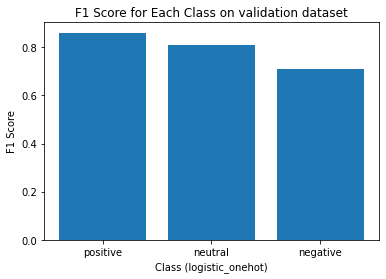

In [ ]:
## bar chart graph with the F1 score for each class onehot
f1_scores_each_class_onehot = {
    'positive': f1_score(labels_val, labels_predicted_one_hot, average='macro', labels=['positive']),
    'neutral': f1_score(labels_val, labels_predicted_one_hot, average='macro', labels=['neutral']),
    'negative': f1_score(labels_val, labels_predicted_one_hot, average='macro', labels=['negative'])
}
plt.bar(f1_scores_each_class_onehot.keys(), f1_scores_each_class_onehot.values())
plt.title("F1 Score for Each Class on validation dataset")
plt.xlabel("Class (logistic_onehot)")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
##LogisticRegression with TF_IDF vectorization
vectorizer_tfidf = TfidfVectorizer()

X_train_tftdf = vectorizer_tfidf.fit_transform(texts_train)

X_val_tfidf = vectorizer_tfidf.transform(texts_val)

clf = LogisticRegression(random_state=42)
clf.fit(X_train_tftdf,labels_train)

labels_predicted_TFIDF = clf.predict(X_val_tfidf)
labels_predicted_TFIDF_train = clf.predict(X_train_tftdf)

accuracy = accuracy_score(labels_val, labels_predicted_TFIDF)
accuracy_train = accuracy_score(labels_train, labels_predicted_TFIDF_train)

print(f"{accuracy=:.3f}")
Accuracy.append([accuracy_train.round(3),accuracy.round(3)])

precision = precision_score(labels_val, labels_predicted_TFIDF,average="macro")
precision_train = precision_score(labels_train, labels_predicted_TFIDF_train,average="macro")

print(f"{precision=:.3f}")
Precision.append([precision_train.round(3),precision.round(3)])


recall = recall_score(labels_val, labels_predicted_TFIDF,average="macro")
recall_train = recall_score(labels_train, labels_predicted_TFIDF_train,average="macro")

print(f"{recall=:.3f}")
Recall.append([recall_train.round(3),recall.round(3)])


f1_logistic_tfidf= f1_score(labels_val, labels_predicted_TFIDF,average="macro")
f1_logistic_tfidf_train= f1_score(labels_train, labels_predicted_TFIDF_train,average="macro")

print(f"{f1_logistic_tfidf=:.3f}")
F1_Score.append([f1_logistic_tfidf_train.round(3),f1_logistic_tfidf.round(3)])



accuracy=0.811
precision=0.814
recall=0.788
f1_logistic_tfidf=0.793


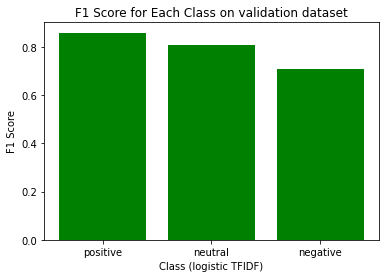

In [ ]:
f1_scores_each_class_logiIFIDF = {
    'positive': f1_score(labels_val, labels_predicted_TFIDF, average='macro', labels=['positive']),
    'neutral': f1_score(labels_val, labels_predicted_TFIDF, average='macro', labels=['neutral']),
    'negative': f1_score(labels_val, labels_predicted_TFIDF, average='macro', labels=['negative'])
}

plt.bar(f1_scores_each_class_logiIFIDF.keys(), f1_scores_each_class_logiIFIDF.values(), color='green')
plt.title("F1 Score for Each Class on validation dataset")
plt.xlabel("Class (logistic TFIDF)")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
from sklearn.svm import SVC
### svc with one-hot vectorization

clf = SVC(random_state=42)
clf.fit(X_train_onehot,labels_train)

labels_predicted_svc = clf.predict(X_val_onehot)
labels_predicted_svc_train = clf.predict(X_train_onehot)

accuracy = accuracy_score(labels_val, labels_predicted_svc)
accuracy_train = accuracy_score(labels_train, labels_predicted_svc_train)

print(f"{accuracy=:.3f}")
Accuracy.append([accuracy_train.round(3),accuracy.round(3)])


precision = precision_score(labels_val, labels_predicted_svc,average="macro")
precision_train = precision_score(labels_train, labels_predicted_svc_train,average="macro")

print(f"{precision=:.3f}")
Precision.append([precision_train.round(3),precision.round(3)])


recall = recall_score(labels_val, labels_predicted_svc,average="macro")
recall_train = recall_score(labels_train, labels_predicted_svc_train,average="macro")

print(f"{recall=:.3f}")
Recall.append([recall_train.round(3),recall.round(3)])


f1_svc = f1_score(labels_val, labels_predicted_svc,average="macro")
f1_svc_train= f1_score(labels_train, labels_predicted_svc_train,average="macro")

print(f"{f1_svc=:.3f}")
F1_Score.append([f1_svc_train.round(3),f1_svc.round(3)])

accuracy=0.776
precision=0.760
recall=0.753
f1_svc=0.755


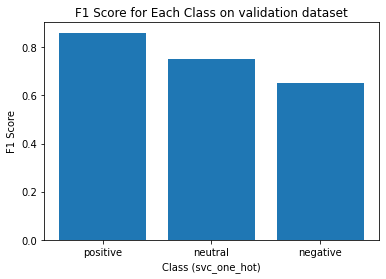

In [ ]:
f1_scores_each_class_svc = {
    'positive': f1_score(labels_val, labels_predicted_svc, average='macro', labels=['positive']),
    'neutral': f1_score(labels_val, labels_predicted_svc, average='macro', labels=['neutral']),
    'negative': f1_score(labels_val, labels_predicted_svc, average='macro', labels=['negative'])
}
plt.bar(f1_scores_each_class_svc.keys(), f1_scores_each_class_svc.values())
plt.title("F1 Score for Each Class on validation dataset")
plt.xlabel("Class (svc_one_hot)")
plt.ylabel("F1 Score")
plt.show()


In [ ]:
table_data = [["metrics", "most frequent [train,val]", "most stratified [train,val]", "logistic one hot [train,val]", "logistic tfidf [train,val]", "svc onehot [train,val]","my own classifier_knn"],
              Accuracy,
              Precision,
              Recall,F1_Score]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))

╒═══════════╤═════════════════════════════╤═══════════════════════════════╤════════════════════════════════╤══════════════════════════════╤══════════════════════════╕
│ metrics   │ most frequent [train,val]   │ most stratified [train,val]   │ logistic one hot [train,val]   │ logistic tfidf [train,val]   │ svc onehot [train,val]   │
╞═══════════╪═════════════════════════════╪═══════════════════════════════╪════════════════════════════════╪══════════════════════════════╪══════════════════════════╡
│ Accuracy  │ [0.392, 0.43]               │ [0.344, 0.366]                │ [0.936, 0.811]                 │ [0.936, 0.811]               │ [0.98, 0.776]            │
├───────────┼─────────────────────────────┼───────────────────────────────┼────────────────────────────────┼──────────────────────────────┼──────────────────────────┤
│ Precision │ [0.131, 0.143]              │ [0.337, 0.359]                │ [0.937, 0.814]                 │ [0.937, 0.814]               │ [0.98, 0.76]             

**classifier b**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
##LogisticRegression with TF_IDF vectorization
myownclassiferlist=[]
vectorizer_tfidf_knn = TfidfVectorizer()
X_train_tftdf_knn = vectorizer_tfidf_knn.fit_transform(texts_train)

X_val_tfidf_knn = vectorizer_tfidf_knn.transform(texts_val)


knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tftdf_knn,labels_train)
labels_predicted_TFIDF_knn = knn.predict(X_val_tfidf_knn)
accuracy = accuracy_score(labels_val, labels_predicted_TFIDF_knn)
print(f"{accuracy=:.3f}")
myownclassiferlist.append(accuracy.round(3))

precision = precision_score(labels_val, labels_predicted_TFIDF_knn,average="macro")
print(f"{precision=:.3f}")
myownclassiferlist.append(precision.round(3))

recall = recall_score(labels_val, labels_predicted_TFIDF_knn,average="macro")
print(f"{recall=:.3f}")
myownclassiferlist.append(recall.round(3))

f1_logistic_tfidf_knn= f1_score(labels_val, labels_predicted_TFIDF_knn,average="macro")
print(f"{f1_logistic_tfidf_knn=:.3f}")
myownclassiferlist.append(f1_logistic_tfidf_knn.round(3))


accuracy=0.535
precision=0.661
recall=0.508
f1_logistic_tfidf_knn=0.469


In [ ]:
accuracy_knn = [Accuracy[i][1] for i in range(1,6)]
precision_knn = [Precision[i][1] for i in range(1,6)]
recall_knn = [Recall[i][1] for i in range(1,6)]
f1_score_knn = [F1_Score[i][1] for i in range(1,6)]
accuracy_knn=["Accuracy"]+accuracy_knn+[myownclassiferlist[0]]
precision_knn=["Precision"]+precision_knn+[myownclassiferlist[1]]
recall_knn=["Recall"]+recall_knn+[myownclassiferlist[2]]
f1_score_knn=["F1 score"]+f1_score_knn+[myownclassiferlist[3]]


In [ ]:
table_data = [["metrics", "most frequent", "most stratified ", "logistic one hot", "logistic tfidf", "svc onehot ","ownclassifier_knn_TFIDF"],
              accuracy_knn,
              precision_knn,
              recall_knn,f1_score_knn]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))

╒═══════════╤═════════════════╤════════════════════╤════════════════════╤══════════════════╤═══════════════╤═══════════════════════════╕
│ metrics   │   most frequent │   most stratified  │   logistic one hot │   logistic tfidf │   svc onehot  │   ownclassifier_knn_TFIDF │
╞═══════════╪═════════════════╪════════════════════╪════════════════════╪══════════════════╪═══════════════╪═══════════════════════════╡
│ Accuracy  │           0.43  │              0.366 │              0.811 │            0.811 │         0.776 │                     0.535 │
├───────────┼─────────────────┼────────────────────┼────────────────────┼──────────────────┼───────────────┼───────────────────────────┤
│ Precision │           0.143 │              0.359 │              0.814 │            0.814 │         0.76  │                     0.661 │
├───────────┼─────────────────┼────────────────────┼────────────────────┼──────────────────┼───────────────┼───────────────────────────┤
│ Recall    │           0.333 │          

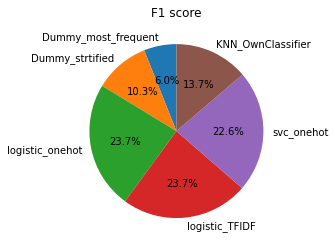

In [ ]:
import matplotlib.pyplot as plt
labels = ['Dummy_most_frequent', 'Dummy_strtified', 'logistic_onehot','logistic_TFIDF','svc_onehot','KNN_OwnClassifier']
sizes = [0.201, 0.341, 0.787,0.787,0.753,0.457]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

ax.set_title('F1 score')
plt.show()


# **tuning**


In [ ]:
Accuracy_tuninglist=["Accuracy",accuracy_knn[4]]
Precision_tuninglist=["Precision",precision_knn[4]]
Recall_tuninglist=["Recall",recall_knn[4]]
F1_score_tuninglist=["F1 score",f1_score_knn[4]]

In [ ]:
##LogisticRegression with TF_IDF vectorization tuning for best performance
from sklearn.model_selection import ParameterGrid


param_grid = {'C': [1,2,3,4,5,6], 'max_features': [len(val_list)],'min_df':[1,2,3,4,5,6,7,8,9],'sublinear_tf':[False,True]}
best_params, best_f1 = None, 0
best_accuracy=0
best_recall=0
best_precision=0
for params in ParameterGrid(param_grid):
    vectorizer = TfidfVectorizer(min_df=params['min_df'],sublinear_tf=params['sublinear_tf'],max_features=params['max_features'])
    X_train = vectorizer.fit_transform(texts_train)
    X_val = vectorizer.transform(texts_val)

    clf = LogisticRegression(random_state=42, C=params['C'])
    clf.fit(X_train,labels_train)

    labels_predicted = clf.predict(X_val)

    f1 = f1_score(labels_val, labels_predicted,average="macro")
    accuracy = accuracy_score(labels_val, labels_predicted_TFIDF)
    precision = precision_score(labels_val, labels_predicted_TFIDF,average="macro")
    recall = recall_score(labels_val, labels_predicted_TFIDF,average="macro")

    print(f"  Evaluating {params=} {accuracy=:.3f}")
    print(f"  Evaluating {params=} {precision=:.3f}")
    print(f"  Evaluating {params=} {recall=:.3f}")
    print(f"  Evaluating {params=} {f1=:.3f}")

    if f1 > best_f1 :
        best_params = params
        best_f1 = f1

    if accuracy>best_accuracy:
      best_params = params
      best_accuracy=accuracy

    if precision>best_precision:
      best_params = params
      best_precision=precision

    if recall>best_recall:
      best_params = params
      best_recall=recall


print(f"{best_params=}")
print(f"{best_f1=:.3f}")
print(f"{best_accuracy=:.3f}")
print(f"{best_precision=:.3f}")
print(f"{best_recall=:.3f}")




  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 1, 'sublinear_tf': False} accuracy=0.811
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 1, 'sublinear_tf': False} precision=0.814
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 1, 'sublinear_tf': False} recall=0.788
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 1, 'sublinear_tf': False} f1=0.793
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 1, 'sublinear_tf': True} accuracy=0.811
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 1, 'sublinear_tf': True} precision=0.814
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 1, 'sublinear_tf': True} recall=0.788
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 1, 'sublinear_tf': True} f1=0.791
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 2, 'sublinear_tf': False} accuracy=0.811
  Evaluating params={'C': 1, 'max_features': 1653, 'min_df': 2, 'sublinear_tf': False} precision=0.8

In [ ]:
vectorizer_tfidf = TfidfVectorizer(min_df=4,sublinear_tf=False,max_features=1705)

X_train_tftdf_tuning = vectorizer_tfidf.fit_transform(texts_train)
X_val_tfidf_tuning = vectorizer_tfidf.transform(texts_val)

clf = LogisticRegression(random_state=42,C=2)
clf.fit(X_train_tftdf_tuning,labels_train)
labels_predicted_TFIDF = clf.predict(X_val_tfidf_tuning)
accuracy = accuracy_score(labels_val, labels_predicted_TFIDF)
print(f"{accuracy=:.3f}")
Accuracy_tuninglist.append(accuracy.round(3))

precision = precision_score(labels_val, labels_predicted_TFIDF,average="macro")
print(f"{precision=:.3f}")
Precision_tuninglist.append(precision.round(3))

recall = recall_score(labels_val, labels_predicted_TFIDF,average="macro")
print(f"{recall=:.3f}")
Recall_tuninglist.append(recall.round(3))

f1_logistic_tfidf_tuning= f1_score(labels_val, labels_predicted_TFIDF,average="macro")
print(f"{f1_logistic_tfidf_tuning=:.3f}")
F1_score_tuninglist.append(f1_logistic_tfidf_tuning.round(3))

accuracy=0.826
precision=0.813
recall=0.808
f1_logistic_tfidf_tuning=0.808


In [ ]:
table_data = [["metrics","logistic_TFIDF","After Tuning"],
              Accuracy_tuninglist,
              Precision_tuninglist,
              Recall_tuninglist,F1_score_tuninglist]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))

╒═══════════╤══════════════════╤════════════════╕
│ metrics   │   logistic_TFIDF │   After Tuning │
╞═══════════╪══════════════════╪════════════════╡
│ Accuracy  │            0.811 │          0.826 │
├───────────┼──────────────────┼────────────────┤
│ Precision │            0.814 │          0.813 │
├───────────┼──────────────────┼────────────────┤
│ Recall    │            0.788 │          0.808 │
├───────────┼──────────────────┼────────────────┤
│ F1 score  │            0.793 │          0.808 │
╘═══════════╧══════════════════╧════════════════╛


### **Q5 BERT**

### **a feature extraction using transformer pipepline using roberta as the base model and training using logisticRegression**

In [ ]:
from transformers import AutoModel, AutoTokenizer
from transformers import RobertaModel, RobertaTokenizer
# Loading the pre-trained RoBERTa model and tokenizer
model_name = "roberta-base"
model = RobertaModel.from_pretrained(model_name)
tokenizer = RobertaTokenizer.from_pretrained(model_name)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Tokenizing the text and then converting it to input IDs
train_encodi= tokenizer(texts_train, truncation=True, padding=True)
val_encodi = tokenizer(texts_val, truncation=True, padding=True)

# Converting the labels into numbers given in the map
label_mapping = {"positive": 2, "neutral": 1, "negative": 0}
train_labels = [label_mapping[label] for label in labels_train]
val_labels = [label_mapping[label] for label in labels_val]


In [ ]:
import numpy as np
from transformers import pipeline

# Define the feature extraction pipeline
feature_extraction = pipeline(
    "feature-extraction",
    model=model,
    tokenizer=tokenizer
)

# Extract the first context vector for each document for the training and validation sets
train_context_vectors = np.array([result[0][0] for result in feature_extraction(texts_train)])
val_context_vectors = np.array([result[0][0] for result in feature_extraction(texts_val)])


In [ ]:
from sklearn.linear_model import LogisticRegression

# using the train data , we will trian the logistic regression model
lr = LogisticRegression(max_iter=2000,C=10)
lr.fit(train_context_vectors,train_labels)


LogisticRegression(C=10, max_iter=2000)

In [ ]:

# Make predictions on the validation data
val_preds = lr.predict(val_context_vectors)

#calculate the scores
Accuracy_Bert=["Accuracy"]
Precision_Bert=["Precision"]
Recall_Bert=["Recall"]
F1_score_Bert=["F1 score"]
accuracy = accuracy_score(val_labels, val_preds)
precision = precision_score(val_labels, val_preds,average="macro")
recall = recall_score(val_labels, val_preds,average="macro")
f1 = f1_score(val_labels, val_preds,average="macro")
Accuracy_Bert.append(accuracy.round(3))
Precision_Bert.append(precision.round(3))
Recall_Bert.append(recall.round(3))
F1_score_Bert.append(f1.round(3))

# evaluation metrics
table_data = [["metrics","Feature extraction with roberta and logisticRegression","trainer from hugging face"],
              Accuracy_Bert,
              Precision_Bert,
              Recall_Bert,F1_score_Bert]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))


╒═══════════╤══════════════════════════════════════════════════════════╕
│ metrics   │   Feature extraction with roberta and logisticRegression │
╞═══════════╪══════════════════════════════════════════════════════════╡
│ Accuracy  │                                                    0.805 │
├───────────┼──────────────────────────────────────────────────────────┤
│ Precision │                                                    0.798 │
├───────────┼──────────────────────────────────────────────────────────┤
│ Recall    │                                                    0.788 │
├───────────┼──────────────────────────────────────────────────────────┤
│ F1 score  │                                                    0.791 │
╘═══════════╧══════════════════════════════════════════════════════════╛


### **b) uisng the trainer from the hugging face library**

In [ ]:

from datasets import Dataset

In [ ]:
learning_rate = 1e-4
batch_size = 16
epochs = 1

In [ ]:
from datasets import Dataset
from transformers import TrainingArguments, Trainer, RobertaForSequenceClassification, RobertaTokenizer, DataCollatorWithPadding

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

train_dataset = Dataset.from_dict({'input_ids': train_encodi['input_ids'],
                                   'attention_mask': train_encodi['attention_mask'],
                                   'labels': train_labels})

validation_dataset = Dataset.from_dict({'input_ids': val_encodi['input_ids'],
                                        'attention_mask':val_encodi['attention_mask'],
                                   'labels': val_labels})

training_args = TrainingArguments(
    output_dir="bert-model",
    evaluation_strategy="epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
)

trainer.train()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

Epoch,Training Loss,Validation Loss
1,No log,0.967828


TrainOutput(global_step=65, training_loss=1.0677753155048078, metrics={'train_runtime': 20.598, 'train_samples_per_second': 50.005, 'train_steps_per_second': 3.156, 'total_flos': 47637917623800.0, 'train_loss': 1.0677753155048078, 'epoch': 1.0})

In [ ]:
# predicting the labels
predictions_first, label_ids, metrics = trainer.predict(validation_dataset)

In [ ]:
preds_first = np.argmax(predictions_first, axis=1)

In [ ]:
accuracy = accuracy_score(val_labels, preds_first)
precision = precision_score(val_labels, preds_first,average="macro")
recall = recall_score(val_labels, preds_first,average="macro")
f1 = f1_score(val_labels, preds_first,average="macro")
Accuracy_Bert.append(accuracy.round(3))
Precision_Bert.append(precision.round(3))
Recall_Bert.append(recall.round(3))
F1_score_Bert.append(f1.round(3))

In [ ]:
table_data = [["metrics","Feature extraction and logisticRegression","trainer from hugging face"],
              Accuracy_Bert,
              Precision_Bert,
              Recall_Bert,F1_score_Bert]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))

╒═══════════╤═════════════════════════════════════════════╤═════════════════════════════╕
│ metrics   │   Feature extraction and logisticRegression │   trainer from hugging face │
╞═══════════╪═════════════════════════════════════════════╪═════════════════════════════╡
│ Accuracy  │                                       0.805 │                       0.715 │
├───────────┼─────────────────────────────────────────────┼─────────────────────────────┤
│ Precision │                                       0.798 │                       0.726 │
├───────────┼─────────────────────────────────────────────┼─────────────────────────────┤
│ Recall    │                                       0.788 │                       0.729 │
├───────────┼─────────────────────────────────────────────┼─────────────────────────────┤
│ F1 score  │                                       0.791 │                       0.709 │
╘═══════════╧═════════════════════════════════════════════╧═════════════════════════════╛


# **c) Tuning the hyperparameter of hugging face trainer**

In [ ]:
from datasets import Dataset
from transformers import TrainingArguments, Trainer, RobertaForSequenceClassification, RobertaTokenizer, DataCollatorWithPadding

model_1 = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
tokenizer_1 = RobertaTokenizer.from_pretrained('roberta-base')

train_dataset = Dataset.from_dict({'input_ids': train_encodi['input_ids'],
                                   'attention_mask': train_encodi['attention_mask'],
                                   'labels': train_labels})

validation_dataset = Dataset.from_dict({'input_ids': val_encodi['input_ids'],
                                        'attention_mask':val_encodi['attention_mask'],
                                   'labels': val_labels})
learning_rate = 5e-5
batch_size = 32
epochs = 1

training_args_1 = TrainingArguments(
    output_dir="bert-model",
    evaluation_strategy="epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0,
)

trainer_1= Trainer(
    model=model_1,
    args=training_args_1,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer_1,
)

trainer_1.train()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

Epoch,Training Loss,Validation Loss
1,No log,0.748101


TrainOutput(global_step=33, training_loss=1.000378233013731, metrics={'train_runtime': 15.7204, 'train_samples_per_second': 65.52, 'train_steps_per_second': 2.099, 'total_flos': 47637917623800.0, 'train_loss': 1.000378233013731, 'epoch': 1.0})

d) comparing the context

In [ ]:
predictions_1, label_ids_1, metrics_1 = trainer_1.predict(validation_dataset)

In [ ]:
preds_1= np.argmax(predictions_1, axis=1)

In [ ]:
accuracy = accuracy_score(val_labels, preds_1)
precision = precision_score(val_labels, preds_1,average="macro")
recall = recall_score(val_labels, preds_1,average="macro")
f1 = f1_score(val_labels, preds_1,average="macro")
Accuracy_Bert.append(accuracy.round(3))
Precision_Bert.append(precision.round(3))
Recall_Bert.append(recall.round(3))
F1_score_Bert.append(f1.round(3))

In [ ]:
table_data = [["metrics","Feature extraction with logisticRegression","end-to-end trainer from hugging face","tuning (hugging face)"],
              Accuracy_Bert,
              Precision_Bert,
              Recall_Bert,F1_score_Bert]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))

╒═══════════╤══════════════════════════════════════════════╤════════════════════════════════════════╤═════════════════════════╕
│ metrics   │   Feature extraction with logisticRegression │   end-to-end trainer from hugging face │   tuning (hugging face) │
╞═══════════╪══════════════════════════════════════════════╪════════════════════════════════════════╪═════════════════════════╡
│ Accuracy  │                                        0.805 │                                  0.715 │                   0.703 │
├───────────┼──────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────────────┤
│ Precision │                                        0.798 │                                  0.726 │                   0.706 │
├───────────┼──────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────────────┤
│ Recall    │                                        0.788 │                                  0.729 │   

# **d) Comparing the context vector vs Trainer from hugging face before and after tuning**

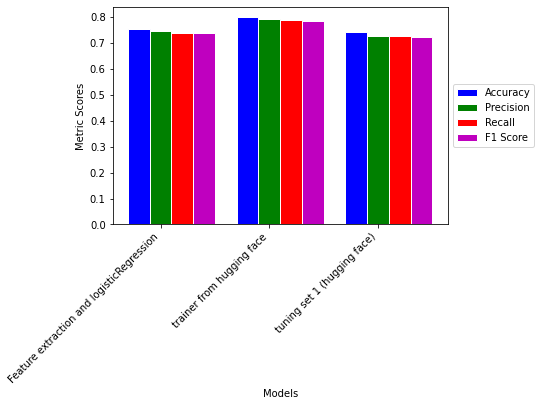

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Feature extraction and logisticRegression', 'trainer from hugging face', 'tuning set 1 (hugging face)']
accuracy = [0.756, 0.799, 0.744]
precision = [0.747, 0.791, 0.728]
recall = [0.738, 0.789, 0.727]
f1score = [0.74, 0.785, 0.725]
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1score, color='m', width=bar_width, edgecolor='white', label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Metric Scores')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.rcParams['figure.figsize'] = [10, 6]

plt.show()


# **Q6-conclusion and future work**

**a) getting the best performing model out of Q3/Q4/Q5 and training on the train data set and test in on the testing data**

In [ ]:
# lets first group all the claassifiers from the Q3/Q4/Q5 and visualize it in a tabel
table_data = [["metrics", "most frequent", "most stratified ", "logistic one hot", "logistic tfidf", "svc onehot ","own_knn_TFIDF"]+["context vectors","end-to-end-trainer","tuning(huggingface_trainer)"],
              accuracy_knn+Accuracy_Bert[1:],
              precision_knn+Precision_Bert[1:],
             recall_knn+ Recall_Bert[1:],f1_score_knn+F1_score_Bert[1:]]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))

╒═══════════╤═════════════════╤════════════════════╤════════════════════╤══════════════════╤═══════════════╤═════════════════╤═══════════════════╤══════════════════════╤═══════════════════════════════╕
│ metrics   │   most frequent │   most stratified  │   logistic one hot │   logistic tfidf │   svc onehot  │   own_knn_TFIDF │   context vectors │   end-to-end-trainer │   tuning(huggingface_trainer) │
╞═══════════╪═════════════════╪════════════════════╪════════════════════╪══════════════════╪═══════════════╪═════════════════╪═══════════════════╪══════════════════════╪═══════════════════════════════╡
│ Accuracy  │           0.43  │              0.366 │              0.811 │            0.811 │         0.776 │           0.535 │             0.805 │                0.715 │                         0.703 │
├───────────┼─────────────────┼────────────────────┼────────────────────┼──────────────────┼───────────────┼─────────────────┼───────────────────┼──────────────────────┼───────────────────────

In [ ]:
# as we can see that the best performing model is the Hugging face trainer based on RoBERTa as base
#lets test it on the test dataset

In [ ]:
label_mapping = {"positive": 2, "neutral": 1, "negative": 0}
test_labels = [label_mapping[label] for label in labels_test]

tests_encodings = tokenizer(texts_test, truncation=True, padding=True)

testing_dataset = Dataset.from_dict({'input_ids': tests_encodings['input_ids'],
                                        'attention_mask':tests_encodings['attention_mask'],
                                   'labels': test_labels})

In [ ]:
predictions_tests, label_ids_tests, metrics_tests = trainer.predict(testing_dataset)

In [ ]:
import numpy as np
preds_tests= np.argmax(predictions_tests, axis=1)

In [ ]:
Accuracy_final=["Accuracy"]
Precision_final=["Precision"]
Recall_final=["Recall"]
F1_score_final=["F1 Score"]

accuracy = accuracy_score(test_labels, preds_tests)
precision = precision_score(test_labels, preds_tests,average="macro")
recall = recall_score(test_labels, preds_tests,average="macro")
f1 = f1_score(test_labels, preds_tests,average="macro")

Accuracy_final.append(accuracy.round(3))
Precision_final.append(precision.round(3))
Recall_final.append(recall.round(3))
F1_score_final.append(f1.round(3))

In [ ]:
table_data = [["Metrics of Testing","Best model (hugging face trainer with RoBERTa "],
              Accuracy_final,
              Precision_final,
              Recall_final,F1_score_final]
tablefmt = "fancy_grid"
headers = ["\033[34m{}\033[0m".format(header) for header in table_data[0]]
table_data = [headers] + table_data[1:]
colored_data = [[f"\033[32m{col}\033[0m" if isinstance(col, int) else col for col in row] for row in table_data]
print(tabulate(colored_data, headers="firstrow", tablefmt=tablefmt))

╒══════════════════════╤══════════════════════════════════════════════════╕
│ Metrics of Testing   │   Best model (hugging face trainer with RoBERTa  │
╞══════════════════════╪══════════════════════════════════════════════════╡
│ Accuracy             │                                            0.605 │
├──────────────────────┼──────────────────────────────────────────────────┤
│ Precision            │                                            0.633 │
├──────────────────────┼──────────────────────────────────────────────────┤
│ Recall               │                                            0.614 │
├──────────────────────┼──────────────────────────────────────────────────┤
│ F1 Score             │                                            0.604 │
╘══════════════════════╧══════════════════════════════════════════════════╛


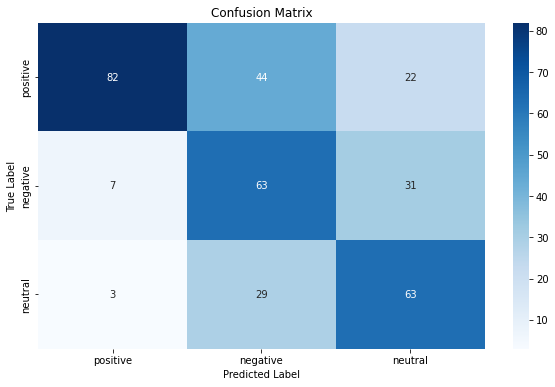

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

reverse_label_mapping = {2: "positive", 1: "neutral", 0: "negative"}
predicted_test = [reverse_label_mapping[label] for label in preds_tests]

conf_matrix = confusion_matrix(labels_test, predicted_test, labels=['positive', 'negative', 'neutral'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative', 'neutral'],
            yticklabels=['positive', 'negative', 'neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **b) error analysis**

In [ ]:
# create a list of misclassified samples
mispredicted = []
for i in range(len(predicted_test)):
    if predicted_test[i] != labels_test[i]:
        mispredicted.append((i, texts_test[i], labels_test[i], predicted_test[i]))
for i in mispredicted[:5]:
    print("Index: ", i[0])
    print("Text: ", i[1])
    print("True label: ", i[2])
    print("Predicted label: ", i[3])
    print("------------")
#exaplaination is given in the report

Index:  4
Text:  connectivity issue router
True label:  positive
Predicted label:  neutral
------------
Index:  5
Text:  worth buy try experience life
True label:  positive
Predicted label:  negative
------------
Index:  6
Text:  package wet
True label:  negative
Predicted label:  neutral
------------
Index:  7
Text:  maximum volume scream stop smart speaker like
True label:  positive
Predicted label:  negative
------------
Index:  9
Text:  home automation song command
True label:  neutral
Predicted label:  negative
------------


# **Rest of the questions are answered in the report . Thank you**